# <font color = f66060>__Практическое задание 2__

# <font color = f66060>  Cosmetics datasets

 __О данном файле:__
- Этот набор данных содержит названия товара, ингредиенты, предпочтения кожи и цену.

### <font color = f66060> Описание переменных набора данных

- Label: Type of product
- Brand: Brand of product
- Name:: Name of Cosmetic
- Price: Price in USD
- Rank: Ranking
- Ingredients: Ingredients of cosmetics
- Combination: Combination of Dry and oily
- Dry: Cosmetics for dry skin 
- Normal: Cosmetics for normal skin
- Oily: Cosmetics for oily skin
- Sensitive: Cosmetics for sensitive skin

### <font color = f66060>Dataset reference 
  Kaggle: https://www.kaggle.com/datasets/kingabzpro/cosmetics-datasets

### <font color = f66060>Причина исследования.

- Моя диссертация посвящена выходу российских компаний на китайский косметический рынок, поэтому для данного исследования были выбраны данные из косметического сектора.
    
- Когда мы хотим попробовать новый косметический товар, всегда трудно сделать выбор. На самом деле, это более чем сложно, что иногда пугает, потому что новые товары, которые мы никогда раньше не пробовали, могут вызвать у меня проблемы с кожей. Мы знаем, что нужная нам информация находится на обратной стороне каждого товара, но если вы не химик, расшифровать список ингредиентов может быть непросто.

### <font color = f66060>Содержание и цель исследования
Мы создадим систему рекомендаций на основе датасета. Изучить, как различные категории товаров подходят для кожи

##### <font color = f66060> 1.  Импорт и понимание наборов данных

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
cosmetics = pd.read_csv('/Users/susiewuss/opt/anaconda3/课件/cosmetics.csv')   # Load dataset files
cosmetics.columns  # View dataset column labels

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [95]:
cosmetics.head()  # View the first five rows, conduct data observation

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [96]:
cosmetics.shape  # Check dataset size information

(1472, 11)

In [97]:
cosmetics.info() # Check dataset details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [98]:
cosmetics["Label"].unique()  # Check cosmetics labels

array(['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream',
       'Sun protect'], dtype=object)

In [99]:
cosmetics["Brand"].unique()  # CheckCheck the names of the cosmetics Cosmetics Brands

array(['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
       "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
       'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
       'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN',
       'FARSÁLI', 'LANEIGE', 'DR. JART+', 'GLOW RECIPE', 'HERBIVORE',
       'TARTE', 'CAUDALIE', 'YOUTH TO THE PEOPLE', 'BIOSSANCE',
       'ESTÉE LAUDER', 'SON & PARK', 'AMOREPACIFIC', 'BOBBI BROWN',
       'ERBORIAN', 'SMASHBOX', 'GLAMGLOW', 'PETER THOMAS ROTH',
       'JACK BLACK', 'PHILOSOPHY', 'PERRICONE MD', 'LANCÔME', 'ALGENIST',
       'MAKE UP FOR EVER', 'KORRES', 'MURAD', 'GUERLAIN', 'DIOR',
       'KORA ORGANICS', 'DR. DENNIS GROSS SKINCARE', 'REN CLEAN SKINCARE',
       'KOPARI', 'CLARINS', 'NURSE JAMIE', 'LANCER', "L'OCCITANE",
       'KATE SOMERVILLE', 'SUPERGOOP!', 'SATURDAY SKIN',
       'SEPHORA COLLECTION', 'MILK MAKEUP', 'DR. BRANDT SKINCARE',
       'J.ONE', 'KAT VON D', 'TATA HARPER', 'GO

In [100]:
cosmetics["Name"].unique()  # Check the names of the cosmetics

array(['Crème de la Mer', 'Facial Treatment Essence',
       'Protini™ Polypeptide Cream', ..., 'Self Tan Dry Oil SPF 50',
       'Pro Light Self Tan Bronzing Mist',
       'DERMAPROTECT Daily Defense Broad Spectrum SPF 50+'], dtype=object)

In [101]:
cosmetics["Price"].unique() # Check the price of the cosmetics

array([175, 179,  68,  38,  60,  72,  29, 325,  45,  47, 105,  58,  90,
        30,  39,  40, 230,  85,  78,  92, 100,  34,  28, 240,  48,  54,
        25,  35,  99,  63,  55,  80,  32,  65,  18,  10, 245,  37,  57,
       120,  44,  52,  42, 110,  49,  82, 195,  59, 145,  95, 290,  36,
       190, 135, 122, 112,  88, 229,  84, 127,  75, 225, 115,  56,  24,
        50, 270,  76, 280, 130,  69, 125,  94, 140,   4, 108, 165, 160,
       150,  27,  64,  23,  67,  26, 185,  98,  62, 136,   7,  20,  19,
        11,  79,  16,   8,  21,  22,  14,  17,  70,  41,  15,  46,  33,
        12,   9,  73, 158, 178, 370, 128,  89, 345, 205, 132, 116, 275,
       149,  81,  86, 169, 118,  61, 300,  74, 265, 152,  96,   6, 250,
         5, 170,   3,  51,  43, 215, 255,  66,  77, 260, 159, 200, 139,
        71,  31,  53])

In [102]:
cosmetics["Rank"].unique()  # Check the rank of the cosmetic brand

array([4.1, 4.4, 3.8, 4.2, 5. , 4.3, 4.5, 4.6, 3.9, 4. , 3.7, 4.8, 4.7,
       0. , 3.3, 3.6, 3.5, 4.9, 3.4, 2.8, 2. , 3.1, 2.6, 3. , 3.2, 1. ,
       2.9, 2.7, 1.8])

In [103]:
cosmetics["Ingredients"].unique()  # Check the cosmetic ingredients

array(['Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.',
       'Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.',
       'Water, Dicaprylyl Carbonate, Gly

In [104]:
cosmetics["Combination"].unique()  # Check if the cosmetics are suitable for combination skin 

array([1, 0])

In [105]:
cosmetics["Dry"].unique()  # Check if the cosmetics are suitable for dry skin

array([1, 0])

In [106]:
cosmetics["Normal"].unique()  # Check if the cosmetics are suitable for normal skin

array([1, 0])

In [107]:
cosmetics["Oily"].unique() # Check if the cosmetics are suitable for oily skin 

array([1, 0])

In [108]:
cosmetics["Sensitive"].unique()  # Check if the cosmetics are suitable for sensitive skin 

array([1, 0])

##### <font color = f66060>2. Обработка недостающих значений

In [109]:
# Filter out the data for moisturiser, we use moisturiser for analysis
moisturizers = cosmetics[cosmetics["Label"]=="Moisturizer"]  
# Filter out the data of oily skin, used to analyze how to choose cosmetics for oily skin
moisturizers_dry = moisturizers[moisturizers["Dry"] == 1]

# Regenerate data index
moisturizers_dry = moisturizers_dry.reset_index(drop=True)
moisturizers_dry

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
185,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Deep Moisture Balm,29,4.7,"Water, Glycerin, Shea Butter, Glyceryl Stearat...",0,1,1,0,0
186,Moisturizer,SHISEIDO,White Lucent All Day Brightener Broad Spectrum...,62,4.6,"Water, Sd Alcohol 40-B, Dimethicone, Dipropyle...",1,1,1,0,0
187,Moisturizer,SATURDAY SKIN,Featherweight Daily Moisturizing Cream,49,4.6,"Water, Butylene Glycol, Ethylhexyl Palmitate, ...",1,1,1,1,1
188,Moisturizer,KATE SOMERVILLE,Goat Milk Moisturizing Cream,65,4.1,"Water, Ethylhexyl Palmitate, Myristyl Myristat...",1,1,1,1,1


In [110]:
cosmetics.isna()  # Check for missing values in the dataset

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1467,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False
1469,False,False,False,False,False,False,False,False,False,False,False
1470,False,False,False,False,False,False,False,False,False,False,False


In [111]:
cosmetics.isna().sum()  # Check for missing values in the dataset

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

##### <font color = f66060> 3.Фильтрация и сортировка данных

In [112]:
# Check the percentage of top rated - rated 5 cosmetics out of all products
def percentage(part, whole):
    percentage = 100 * float(part) / float(whole)
    return str(percentage) + "%"

print(percentage(cosmetics[cosmetics["Rank"] == 5].shape[0], cosmetics["Label"].shape[0]))

3.192934782608696%


In [113]:
# Sorting cosmetics data by price
cosmetics.sort_values(by=["Price"], ascending=False).head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
587,Treatment,LA MER,The Concentrate,370,3.9,"Cyclopentasiloxane, Algae (Seaweed) Extract, G...",0,0,0,0,0
601,Treatment,LA MER,The Regenerating Serum,345,3.9,"Water, Algae (Seaweed) Extract, Dimethicone, H...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0
790,Treatment,SHISEIDO,Future Solution LX Intensive Firming Contour S...,300,4.3,"Dimethicone, Dipropylene Glycol, Glycerin, Bis...",1,1,1,1,1
665,Treatment,BIOEFFECT,30 Day Treatment,290,5.0,"Glycerin, Water, Sodium Hyaluronate, Trometham...",1,1,1,1,1


In [114]:
# Ranking based on both rating and price
cosmetics.sort_values(by=["Rank", "Price"], ascending=[False, True]).head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
966,Face Mask,SEPHORA COLLECTION,Sleeping Mask - Coconut Water,4,5.0,"Water, Butylene Glycol, Glycerin, Betaine, Phe...",1,1,1,1,1
974,Face Mask,SEPHORA COLLECTION,Sleeping Mask - Aloe Vera,4,5.0,"Water, Butylene Glycol, Glycerin, Phenoxyethan...",1,1,1,1,1
953,Face Mask,SEPHORA COLLECTION,Face Mask - Grape - Anti-pollution,6,5.0,"Water, Butylene Glycol, Glycerin, Betaine, Alo...",1,1,1,1,1
572,Cleanser,SEPHORA COLLECTION,Cleansing Wipes - Pomegranate - Energizing,7,5.0,No Info,0,0,0,0,0
954,Face Mask,FOREO,Make My Day Hydrating & Anti-Pollution UFO™ Ac...,9,5.0,-Hyaluronic Acid -Red Algae,1,1,1,1,1


 ##### <font color = f66060> 4. Генерирование новых переменных

In [115]:
# Scoring variables converted to binary form
cosmetics["Rank"].apply(lambda x: 1 if x == 5 else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1467    0
1468    0
1469    0
1470    0
1471    0
Name: Rank, Length: 1472, dtype: int64

In [116]:
# Generate a new variable rank_top, where the product with a score of 5 will be 1 and the rest will be 0
cosmetics["rank_top"] = cosmetics["Rank"].apply(lambda x: 1 if x == 5 else 0)
cosmetics.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,rank_top
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,0


In [117]:
# Calculate the quantity of top rated cosmetics
print(cosmetics["rank_top"].sum())  # of 1's in the new variable
print((cosmetics["Rank"] == 5).sum())  # Quantity of top rated cosmetics

47
47


In [118]:
# Check price averages
cosmetics["Price"].mean()

55.58423913043478

In [119]:
# Classification levels
def get_price_cat(price):
    if price < 30:
        return "Low"
    elif price < 40:
        return "Middle-"
    elif price < 70:
        return "Middle+"
    elif price >= 70:
        return "High"
    else:
        return price


# Use price_cat new variable, and save to dataset
cosmetics["price_cat"] = cosmetics["Price"].apply(get_price_cat)
cosmetics["price_cat"] = pd.Categorical(cosmetics["price_cat"])
cosmetics.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,rank_top,price_cat
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,High
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,0,High
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,0,Middle+
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,High
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,0,Middle-


 ##### <font color = f66060> 5.Базовая визуализация данных

<AxesSubplot:>

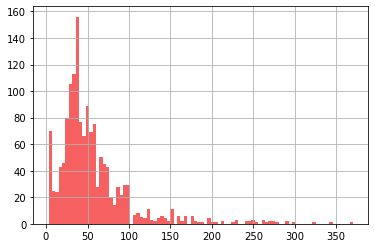

In [120]:
# Cosmetics by price distribution
cosmetics["Price"].hist(bins=90, color="#f66060")

__5.1 Мы видим, что цена единицы косметики в основном сосредоточена между 0 и 50 usd.__

In [121]:
# of cosmetics with different price classifications
cosmetics["price_cat"].value_counts()

Middle+    476
Low        359
High       334
Middle-    303
Name: price_cat, dtype: int64

<AxesSubplot:title={'center':'price'}>

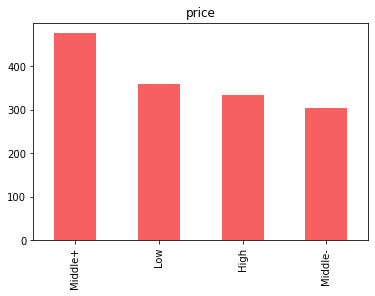

In [122]:
# Price classifications distribution
cosmetics["price_cat"].value_counts().plot(
    kind="bar", color="#f66060", title="price")

<AxesSubplot:title={'center':'price & Oily'}, xlabel='price_cat'>

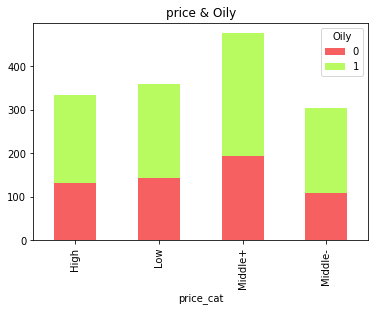

In [123]:
# Price classification of cosmetics in relation to oily skin
cosmetics.groupby('price_cat')['Oily'].value_counts().unstack().plot(kind='bar', stacked=True, color = ['#f66060', '#B8FB60'], title = 'price & Oily')

__5.2 Мы видим обзор цен на косметику для жирной кожи.__

<AxesSubplot:title={'center':'Price & Normal'}, ylabel='Normal'>

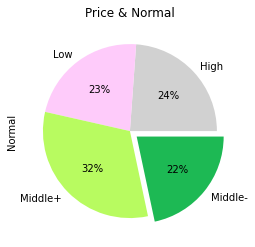

In [124]:
# Cosmetic prices in relation to normal skin
colors = ['#D1D1D1', '#FECBFA', '#B8FB60', '#1DB954']
cosmetics.groupby('price_cat')['Normal'].sum().plot(kind = 'pie', colors = colors, explode = [0, 0, 0, 0.1], autopct='%1.0f%%', title = 'Price & Normal')

__5.2 Из круглой диаграммы мы видим диапазон цен на увлажняющую косметику для обычного типа кожи. Основное внимание уделяется среднему ценовому диапазону.__

__5.3 Мы видим, что цены косметических брендов в базе данных в основном распределены в низком и среднем ценовом диапазоне.__

 ### <font color = f66060> 6. Анализ корреляции

In [125]:
# Description of data set
cosmetics.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive,rank_top
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587,0.031929
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985,0.175872
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
cosmetics

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,rank_top,price_cat
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,High
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,0,High
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,0,Middle+
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,High
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,0,Middle-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1,0,Middle-
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0,0,Middle+
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0,0,Middle+
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0,0,Low


In [127]:
# Correlation between all features
cosmetics.corr()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive,rank_top
Price,1.000000,-0.025215,0.012575,0.065525,0.049230,0.003978,0.007621,0.149374
Rank,-0.025215,1.000000,0.036904,0.026982,0.051926,0.021041,0.015946,0.242664
Combination,0.012575,0.036904,1.000000,0.830784,0.927966,0.882528,0.689316,0.041949
Dry,0.065525,0.026982,0.830784,1.000000,0.874436,0.745767,0.722367,0.056642
Normal,0.049230,0.051926,0.927966,0.874436,1.000000,0.835227,0.713320,0.043387
Oily,0.003978,0.021041,0.882528,0.745767,0.835227,1.000000,0.648097,0.035252
Sensitive,0.007621,0.015946,0.689316,0.722367,0.713320,0.648097,1.000000,-0.016533
rank_top,0.149374,0.242664,0.041949,0.056642,0.043387,0.035252,-0.016533,1.000000


In [128]:
# Correlation between each feature and dry skin type
cosmetics.corr()['Dry'].sort_values(ascending=False)

Dry            1.000000
Normal         0.874436
Combination    0.830784
Oily           0.745767
Sensitive      0.722367
Price          0.065525
rank_top       0.056642
Rank           0.026982
Name: Dry, dtype: float64

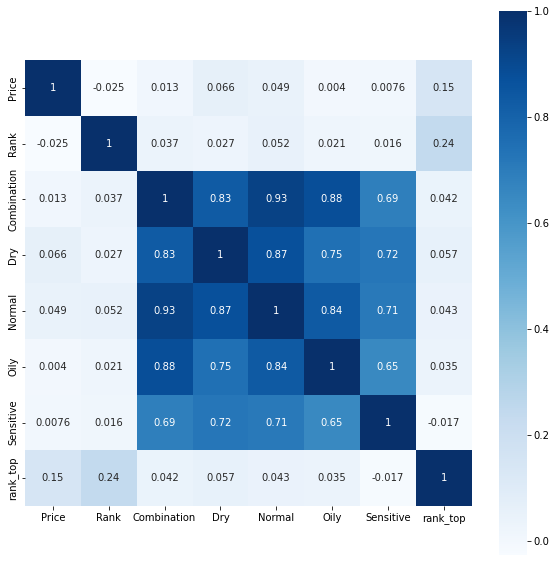

In [129]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(10,10)
fig = sns.heatmap(cosmetics.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')  

__6.1 Мы должны увидеть корреляцию между переменными.__

### <font color = f66060> 7. Гипотезы

__H0 Предполагая отсутствие корреляции между ценами на косметику и рейтингами.__

In [130]:
# Используйте тест Шапиро-Уилка (W-тест).
from scipy.stats import shapiro

# Анализ цен
features = ['Price']
data = cosmetics[features]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('H0 не может быть отвергнуто, и данные выборки соответствуют нормальному распределению')
else:
    print('Не соответствует нормальному распределению')

stat=0.759, p=0.000
Не соответствует нормальному распределению


In [131]:
# Анализ оценки
features = ['Rank']
data = cosmetics[features]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('H0 не может быть отвергнуто, и данные выборки соответствуют нормальному распределению')
else:
    print('Не соответствует нормальному распределению')

stat=0.672, p=0.000
Не соответствует нормальному распределению


In [132]:
# Тест на Chi-square
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [133]:
features = ['Price', 'Rank']
table = cosmetics[features]

stat, p, dof, expected = chi2_contingency(table)
print('df_value dof=%d' % dof)
print('Распределение ожиданий')
print(expected)

# Выберите значение chi-square для проверки
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Отвергаем H0, две переменные коррелированы')
else:
    print('H0 не может быть отвергнуто, и две переменные независимы друг от друга')

df_value dof=1471
Распределение ожиданий
[[166.64803897  12.45196103]
 [170.36993823  12.73006177]
 [ 67.36637645   5.03362355]
 ...
 [ 53.50230174   3.99769826]
 [ 19.53997107   1.46002893]
 [ 41.87136658   3.12863342]]
probability=0.950, critical=1561.340, stat=3888.342
Отвергаем H0, две переменные коррелированы


In [134]:
# Вывести взаимосвязь между ценой косметики и рейтингом с помощью p-значений
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Отвергаем H0, две переменные коррелированы')
else:
    print('H0 не может быть отвергнуто, и две переменные независимы друг от друга')

significance=0.050, p=0.000
Отвергаем H0, две переменные коррелированы


__7.1 Итак: мы можем получить результат, протестировав эти два метода, существует корреляция между ценой косметики и рейтингом.__

<Figure size 432x288 with 0 Axes>

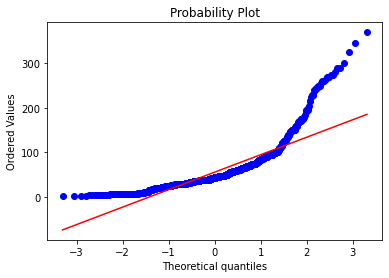

<Figure size 432x288 with 0 Axes>

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 正态分布图
data = cosmetics['Price'].tolist()
stats.probplot(data, plot = plt)
plt.figure()


Мы визуализируем нормальное распределение цен на косметику.

### <font color = f66060>  8. Логистическая регрессия

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
# Метод поиска по сетке для выбора наилучших параметров модели
parameters = {'penalty': ('l1', 'l2'),'C': (0.01, 0.1, 1, 10, 100, 1000)}
grid_search = GridSearchCV(linear_model.LogisticRegression(), parameters,  verbose=0, scoring='accuracy', cv=5)
grid =grid_search.fit(X_train, y_train)
print('Лучшие показатели：%0.3f' % grid_search.best_score_)
best_parameters= grid_search.best_estimator_.get_params()
print('Параметры оптимальности：\n', best_parameters)

Лучшие показатели：0.927
Параметры оптимальности：
 {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

__8.1__ Дополнение: Перед использованием алгоритма логистической регрессии мы должны определить параметры логистической регрессии, здесь мы используем метод поиска по сетке для проверки на нашем наборе данных и выводим наилучшие параметры модели логистической регрессии с наилучшими результатами

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

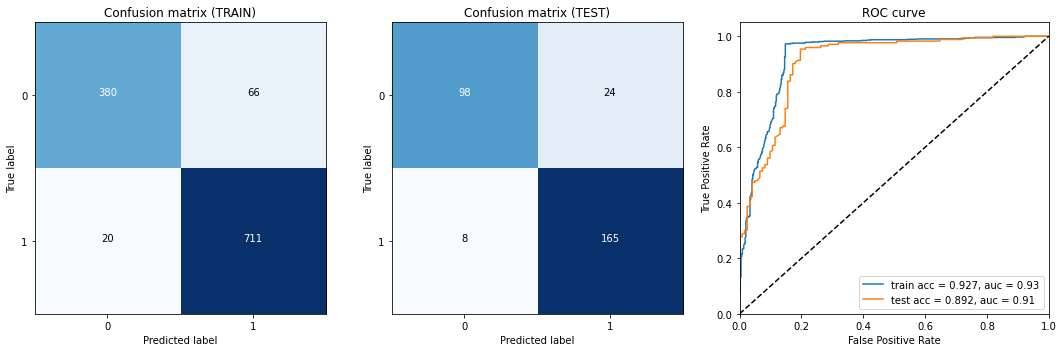

In [139]:
# Разделить наборы данных
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

# Классификация логистической регрессии
logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict_proba(X_train)[:,1]
y_test_pred = logreg.predict_proba(X_test)[:,1]

threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

__8.2 Мы строим модель логистической регрессии и затем проверяем результаты на обучающем и тестовом наборах. Как вы можете видеть, третий график показывает, что показатель точности на обучающем наборе составляет 92,7%, что очень хорошо, и 89,2% на тестовом наборе. Основываясь на этой модели, мы можем ввести цену, рейтинг и ингредиенты определенной косметики, чтобы определить, подходит ли она для людей с жирной кожей.__

### <font color = f66060>9. Факторный анализ

In [140]:
# Импорт необходимых наборов в python
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

__Шаг 1: Проверка адекватности__

In [141]:
features = ['Price', 'Rank', 'rank_top', 'Dry', 'Normal', 'Combination', 'Sensitive']
df = cosmetics[features]

In [142]:
# Использование метода Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(chi_square_value, p_value)

6391.304117748566 0.0


__9.1.1 Мы можем получить значение 0 для p-value, что указывает на то, что корреляционная матрица переменных не является единичной матрицей, т.е. между переменными существует определенная корреляция, и мы можем перейти к следующему факторному анализу.__

In [143]:
# Использовать метода KMO Test
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model) 

0.8027470927767363


__9.1.2__ Выходное значение равно 0,8027470927767363, что __больше 0,6__, поэтому тест пройден и позволяет провести следующий факторный анализ.

__Шаг 2: Выбор факторов__

In [144]:
faa = FactorAnalyzer(25,rotation=None)
faa.fit(df)

# Этот шаг позволяет получить ev, v
ev,v=faa.get_eigenvalues()

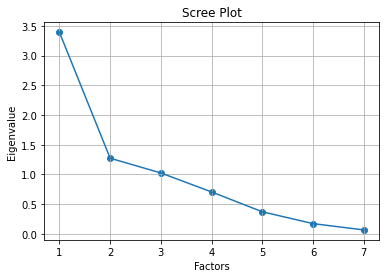

In [145]:
# Построение линейного графика с разбросом из только что полученных данных EV и V
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)

plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

plt.grid()  # Показать сетку
plt.show()   # Показать графику

__9.2.1 С помощью этого шага мы получили пять факторов для следующего этапа анализа.__

__Шаг 3: Проведение факторного анализа__

In [146]:
import seaborn as sns

fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)

df_cm = pd.DataFrame(np.abs(fa.loadings_),index=df.columns)

Text(86.09375, 0.5, 'Sepal Width')

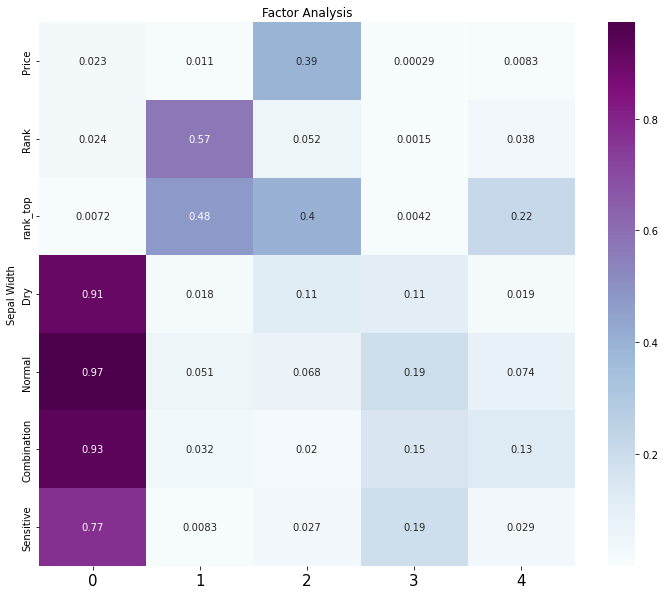

In [147]:
# Составление тепловых карт для лучшего представления актуальности
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax,color='red')
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

__9.3.1 На основе визуального отображения, чтобы более наглядно увидеть, какие признаки более связаны с каждой скрытой переменной, матрица коэффициентов выводится на тепловую карту.__

__9.3.2 Как видно из карты, две переменные - рейтинг и цена - имеют более темный цвет, причем корреляция между жирным типом кожи, нормальным типом кожи и комбинированным типом кожи выше.__

__Все исследование увенчалось результатом, который знают все: чтобы купить подходящую вам косметику, нужно обратиться к цене и рейтингу косметики.__